# **Laborator 1: RANSAC – Potrivirea unei linii la un set de puncte**

Scopul acestei lucrări de laborator este de a introduce o metodă robustă de potrivire a unui model la un set de puncte (care pot conține și zgomote), denumită RANSAC.

### Fundamente teoretice

Random Sample Consensus (RANSAC) - consensul esantioanelor aleatoare - este o paradigma pentru potrivirea unui model la date experimentale, introdusa de Martin A. Fischler si Robert C. Bolles in 1981.

Dupa cum au declarat Fischler si Bolles: 
> "Procedura RANSAC este opusul tehnicilor conventionale de filtrare: in loc sa folosim cat mai multe date posibile pentru a obtine o solutie initiala, si apoi sa eliminam punctele invalide, RANSAC foloseste un set initial de date cat mai mic posibil si apoi mareste acest set cu date valide atunci cand este posibil."

#### Algoritmul RANSAC este urmatorul:

**Obiectiv:** Potrivirea robusta a unui model la un set de date $S$ care contine puncte valide (fara zgomot) si invalide (cu zgomot).

1. Selectie aleatoare a unui esantion de puncte $s$ din multimea $S$ si instantiere a modelului din acest esantion.
2. Determinarea multimii de date $S_i$, care contine puncte situate la o distanta mai mica decat un prag $t$ de model. Multimea $S_i$ este multimea de consens a esantionului, si defineste punctele din S care satisfac modelul.
3. Daca dimensiunea lui $S_i$ (numarul de puncte care satisfac modelul) este mai mare decat un prag $T$, algoritmul se termina. Optional, se poate estima din nou modelul folosind toate punctele din $S_i$.
4. Daca dimensiunea lui $S_i$ este mai mica decat $T$, se selecteaza un nou subset si se repeta pasii anteriori.
5. Dupa $N$ incercari, se selecteaza multimea de consens $S_i$ cu cele mai multe puncte, si modelul este reestimat folosind toate punctele din aceasta multime.

##### Definiția parametrilor este următoarea:

- **$s$** – dimensiunea subsetului selectat pentru potrivirea modelului, adică numărul de puncte;
- **$S$** – setul de puncte;
- **$S_i$** – submulțimea punctelor valide (fără zgomot) pentru pasul i, sau setul de suport;
- **$t$** – valoarea prag pentru distanța maximă admisă față de model;
- **$T$** – valoarea prag pentru semnalizarea unei potriviri a datelor suficient de bună;
- **$N$** – numărul maxim de iterații;



### RANSAC pentru linii

Algoritmul RANSAC poate fi aplicat pentru potrivirea unei drepte la un set de puncte. Problema, ilustrată în figura de mai jos, este următoarea: fiind dată o mulțime de puncte 2D, găsiți linia care minimizează suma distanțelor perpendiculare, în condițiile în care nici unul din punctele valide nu deviază de la linie cu mai mult de t unități. 

![image.png](imgs/ransac_line.png)


Există de fapt două probleme: potrivirea unei linii la date și clasificarea datelor în puncte valide și puncte zgomot. Pragul t este selectat în funcție de zgomotul propriu măsurătorii.

Primul pas este selectarea a două puncte aleator, iar aceste puncte vor defini o linie. Mulțimea suport (consens) pentru această linie este dată de punctele care sunt la mai puțin de o distanță prag de această linie. Selecția aleatoare este repetată de mai multe ori, și linia care are cele mai multe puncte suport este considerată potrivirea cea mai robustă. Intuitiv, dacă unul din cele două puncte alese pentru potrivirea liniei este parte a zgomotului, linia estimată nu va avea o mulțime suport foarte mare.

Dacă măsurăm calitatea unei linii prin mărimea mulțimii suport, avem avantajul de a favoriza cele mai bune linii de la început. Astfel, linia (a, b) din Figura de mai sus are o mărime a suportului de 10, pe când linia (c, d), unde punctele eșantionate sunt vecine, are un suport de doar 2. Putem deduce din acest lucru că c sau d este un punct zgomot.

#### Considerații suplimentare:

1. **De ce metoda este randomizată?** Încercarea exhaustivă a tuturor subseturilor este posibilă doar pentru un set de date mic. De exemplu, pentru un set de date de dimensiunea |S| = n avem n(n − 1)/2 perechi de puncte pentru a verifica posibilele linii. Problema devine rapid greu de rezolvat pentru valorile lui n de ordinul 10!. Dacă modelul este potrivit folosind mai mult de 2 puncte, subseturile posibile sunt și mai mari. Selectând în mod repetat două puncte aleatorii evităm să verificăm toate submulțimile posibile.

2. **Câte încercări ar trebui să facem?** Valoarea pentru numărul de iterații N ar trebui aleasă astfel încât să existe o probabilitate p suficient de mare ca cel puțin în una dintre N încercări toate punctele selectate să fie valide. Pentru a calcula N se consideră următoarele:

   - $q$ – probabilitatea estimată ca un punct să fie valid;
   - $q^s$ – probabilitatea ca toate punctele s să fie valide;
   - $1 − q^s$ – probabilitatea ca cel puțin un punct să fie invalid;
   - $(1 − q^s)^N$ – probabilitatea ca în fiecare dintre cele N încercări să existe cel puțin un punct invalid;
   - $p = 1 − (1 − q^s)^N$ – probabilitatea ca cel puțin o încercare să fie fără puncte invalide.
   - $1-p = (1 − q^s)^N$



   Valoarea lui N poate fi calculată pe baza unei valori fixe pentru un p selectat:

  $$  
   N = \frac{\log(1 - p)}{\log(1 - q^s)}
   $$

3. **Cum se alege pragul distanței t?** Am dori să alegem pragul distanței t, astfel încât un punct să fie valid cu o probabilitate dată q. Pentru aceasta avem nevoie de distribuția de probabilitate pentru distanța unui punct valid față de model (modelul erorii de măsurare). În practică, pragul distanței este de obicei ales empiric. Totuși, dacă se presupune că eroarea de măsurare este gaussiană cu medie zero și deviație standard σ, atunci valoarea pentru t poate fi setată la 3σ.

4. **Cât de mare este un consens acceptabil?** O regulă generală este să oprim algoritmul dacă dimensiunea setului de consens este similară cu numărul de puncte valide care se presupune că sunt în setul de date. Având în vedere proporția de valori invalide q, pentru n puncte de date, dimensiunea consensului trebuie să fie mai mare ca T = q·n.


### **Pasul 1: Încărcarea și vizualizarea datelor**

**Ex 1**: Construiți lista de puncte prin găsirea tuturor punctelor negre din imaginea de intrare si apoi  vizualizati punctele. Imaginile le gasiti in folderul 'prs_res_Ransac'.

In [7]:
                                                                                                                                                                                                                                                                                                                    !pip install opencv-python
!pip install numpy
!pip install matplotlib

IndentationError: unexpected indent (2869474082.py, line 1)

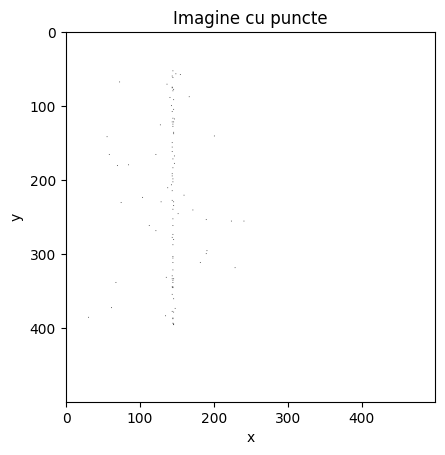

[ 52  56  57  59  61  67  70  74  75  77  79  87  88  91  99 104 107 116
 117 121 121 124 125 127 135 137 140 141 149 155 161 165 165 167 171 177
 179 180 183 191 194 198 202 206 210 214 220 223 227 229 229 230 234 239
 240 245 252 253 255 255 261 261 268 273 277 280 287 295 299 303 305 311
 311 318 321 329 331 333 333 335 338 338 344 344 345 354 360 372 373 377
 378 383 385 386 387 393 394 395] [144 148 154 143 144  72 136 143 143 145 144 166 140 145 142 145 143 144
 146 143 145 144 127 144 145 145 200  55 143 143 143  58 121 146 144 146
  84  69 144 143 143 144 144 142 137 143 159 103 143 128 145  74 145 144
 171 151 144 189 223 240 112 144 121 144 143 145 144 190 189 144 144 144
 181 228 144 143 135 143 145 144  67 144 143 144 144 143 145  61 147 143
 145 134  30 144 144 144 145 145]
Dimensiunea x = (98,)
Dimensiunea y = (98,)
[[144  52]
 [148  56]
 [154  57]
 [143  59]
 [144  61]
 [ 72  67]
 [136  70]
 [143  74]
 [143  75]
 [145  77]
 [144  79]
 [166  87]
 [140  88]
 [145  91]
 [14

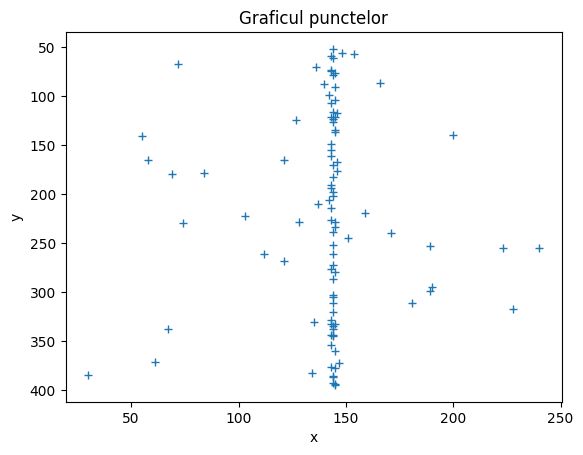

In [8]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

# Incarcati punctele dintr-o imagine 'points1.bmp'
image = cv2.imread("prs_res_Ransac/points5.bmp", cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Imagine cu puncte')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y, x = np.where(image == 0) #unde e negru 
print (y,x)
print(f'Dimensiunea x = {x.shape}')
print(f'Dimensiunea y = {y.shape}')

points = np.column_stack((x, y)) #matrice cu 2 coloane , sa am acces la tot 

print(points)
print(f'Dimensiunea points = {points.shape}')

# Vizualizarea punctelor
plt.plot(points[:,0], points[:,1], '+')
plt.title('Graficul punctelor')
plt.gca().invert_yaxis() # Flip the y-axis to match image coordinates (origin at top-left)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### **Pasul 2: Implementarea algoritmului RANSAC**

**Ex 2**: Calculați si afisati numărul de iteratii N folosind parametrii dați.

 $$  
   N = \frac{\log(1 - p)}{\log(1 - q^s)}
   $$

Calculați valoarea T (numarul minim asteptat de inliers):

 $$  
  T = q * n
   $$

In [9]:
# Parametrii RANSAC
t = 5
p = 0.99
q = 0.3 # modificati q = 0.8 pentru alte imagini in afara de points1.bmp
s = 2

# Calculati N si T

N = np.log(1-p)/np.log(1-q**s) #nr de iteratii , de cate ori selectam 2 puncte 
N= int(N)
print(N)

#x.shape ar da o tupla , cu [0] accesez primul element (90,) 
n= x.shape[0] # 90 
T = int(q*n)
print(T)

48
29


### **Pasul 3: Potrivirea unei linii cu RANSAC**

**Ex 3**: Implementati algoritmul RANSAC.

Pasii algoritmului sunt:

1. Alege s(=2) puncte diferite (aleator)
2. Determină ecuația dreptei care trece prin punctele selectate
3. Găsește distanțele de la fiecare punct față de dreaptă
4. Numără câte puncte sunt puncte de consens $S_i$ aflate la o distanță < t față de dreaptă
5. Salvează parametrii dreptei (a, b, c) dacă această dreaptă are cel mai mare număr de puncte de consens (numarul de puncte care satisfac modelul) $S_i$ de până acum
6. Dacă numărul de puncte din $S_i$ este mai mare decât $T = q*n$, algoritmul se oprește
7. Dacă se atinge numărul maxim de iterații $N = log(1 - p) / log(1 - q^s)$, algoritmul se oprește
8. Mergi la pasul 1.

Modelul dreptei:

Ecuatia unei drepte care trece prin doua puncte distincte $(x_1, y_1)$ si $(x_2, y_2)$ este data de:

$$ax + by + c = 0$$
$$a = (y_1 - y_2)$$
$$b = (x_2 - x_1)$$
$$c = x_1y_2 - x_2y_1$$

Distanta de la un punct $(x_0, y_0)$ la o dreapta definita de  $ax + by + c = 0$ este:

$$d = \frac{|ax_0 + by_0 + c|}{\sqrt{a^2 + b^2}}$$



In [11]:
import random

# Potrivește o linie prin două puncte și returnează parametrii dreptei a, b, c
def fit_line(p1, p2):
    x1,y1 = p1 
    x2, y2 = p2
    a = int(y1-y2)
    b = int(x2-x1)
    c = int(x1*y2 - x2*y1)
    return a,b,c

# Calculează distanța unui punct față de o linie. 
def distance_point_to_line(a, b, c, point):
    return np.abs(a*point[0]+ b*point[1] +c) / np.sqrt(a**2+ b**2)

a,b,c = fit_line(points[0,:] , points[1,:])
# Implementati algoritmul RANSAC
opt_params = (-1,-1,-1)
max_iliers = 0 ;

np.random.seed(0) #forteaza generatorul sa porneasca de la aceeasi valoare 

for trial in range(N) : 
    i= np.random.randint(n)
    j = np.random.randint(n)
    while i == j :
        j = np.random.randint(n)
    #print(trial,i,j)
    a, b, c = fit_line(points[i,:], points[j,:])
    inliers = 0 
    for p in points :
        if distance_point_to_line(a, b, c , p) < t :
            inliers +=1
            
    if inliers > max_inliers : 
        max_iliers = inliers 
        opt_params = (a,b,c) 
    if inliers > T :
        break 

print("(a,b,c): ", opt_params)
print("Nr maxim de inliers:", max_inliers)
    
    


(a,b,c):  (220, 0, -31680)
Nr maxim de inliers: 5


### **Pasul 4: Vizualizați cea mai buna linie obtinuta**

**Exercițiu 4**: Desenați linia optimă găsită folosind RANSAC.

In [125]:
(a,b,c) = opt_params


if abs(b) < 10 : 
    y1 = 0  
    y2 =500
    x1 = (-c - b*y1)/a
    x2 = (-c - b*y2)/a
else : 
    x1 = 0
    x2 = 500
    y1 = (-c - a*x1)/b
    y2 = (-c - a*x2)/b
    
    plt.plot(points[:,0], points[:,1], '+') #toate pct
    plt.plot([x1,x2],[y1,y2]) # linia

plt.show()
    


### **Concluzie**
În acest laborator, ați învățat cum să aplicați algoritmul RANSAC pentru a potrivi o linie unui set de puncte dintre care o parte sunt afectate de zgomot.

Referințe:
1. Robert C. Bolles, Martin A. Fischler: A RANSAC-Based Approach to Model Fitting and Its Application to Finding Cylinders în Range Data, 1981.
2. Richard Hartley, Andrew Zisserman: Multiple View Geometry în Computer Vision, 2003.
    